0.18565683283962786 iaf1260
0.8315513387383722 ijo1366
0.0065359494527193135 ijr904


/tmp/ipykernel_2146171/3920957439.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(['iAF1260', 'iJO1366', 'iJR904', 'iML1515'], fontsize=12)


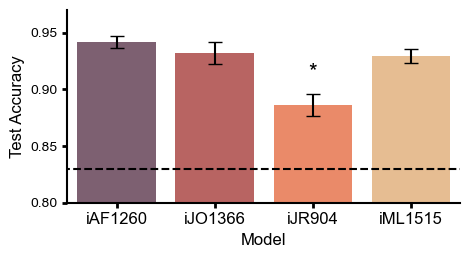

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind

# Set data folder path and model names
local_data_folder = '/home/cjmerzbacher/low_dim_analysis/ecoli/data/'
models = ['iaf1260', 'ijo1366', 'ijr904', 'iml1515']

# Set up custom color palette
import colormaps as cmaps
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"
N = 4
color_palette = [cmaps.lipari[100:220](i / (N - 1)) for i in range(N)]

# Load and process data
plot_data = pd.read_csv('fig2f.csv')
mean_data = plot_data.groupby('model')['accuracy'].mean()
stderr_data = plot_data.groupby('model')['accuracy'].sem()

# Create bar plot
fig, axs = plt.subplots(1, 1, figsize=(4.88, 2.68))
bars = axs.bar(mean_data.index, mean_data, yerr=stderr_data, capsize=5, color=color_palette)

# Set axis labels and limits
axs.set_xlabel('Model', fontsize=12)
axs.set_ylabel('Test Accuracy', fontsize=12)
axs.set_ylim([0.8, 0.97])
axs.set_xlim([-0.5, 3.5])
axs.set_xticklabels(['iAF1260', 'iJO1366', 'iJR904', 'iML1515'], fontsize=12)

# Customize tick parameters and spines
axs.xaxis.set_tick_params(width=2, labelsize=12)
axs.yaxis.set_tick_params(width=2, labelsize=10)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['left'].set_linewidth(1.5)
axs.spines['bottom'].set_linewidth(1.5)

# Add baseline
axs.hlines(0.83, -1, 4, color='black', linestyles='dashed', label='Naive baseline')

# Perform statistical tests and add significance markers
significance_level = 0.05
star_height = 0.01

# Compare iML1515 to other models
for j, m2 in enumerate(models):
    if m2 == 'iml1515':
        continue
    
    # Perform t-test
    group1 = plot_data[plot_data['model'] == 'iml1515']['accuracy']
    group2 = plot_data[plot_data['model'] == m2]['accuracy']
    t_stat, p_value = ttest_ind(group1, group2)
    print(p_value, m2)

    # Add significance star if p < 0.05
    if p_value < significance_level:
        x1, x2 = models.index(m2), 2
        y_max = min(mean_data['iml1515'] + stderr_data['iml1515'], mean_data[m2] + stderr_data[m2])
        axs.text(x2, y_max+star_height, '*', ha='center', va='bottom', color='black', fontsize=16)

fig.tight_layout()